In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score, roc_auc_score, roc_curve, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import tree,set_config

In [32]:
pd.set_option('display.max_columns', 500)
set_config(print_changed_only = False)

In [3]:
data = pd.read_csv('drug200.csv')


In [4]:
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [5]:
data.shape

(200, 6)

In [6]:
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [8]:
def missing_data(df):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = round(data.isnull().sum().sort_values(ascending = False) * 100 /len(data),2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [9]:
missing_data(data)

,Total,Percent
Age,0,0.0
Sex,0,0.0
BP,0,0.0
Cholesterol,0,0.0
Na_to_K,0,0.0
Drug,0,0.0


In [10]:
data['BP'].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [11]:
data['Cholesterol'].value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [12]:
data['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [13]:
data['Sex'].replace(0, 'F',inplace=True)
data['Sex'].replace(1, 'M',inplace=True)

In [14]:
data.Sex[data.Sex == 'M'] = 1
data.Sex[data.Sex == 'F'] = 2

<ipython-input-14-89f77d4038ef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Sex[data.Sex == 'M'] = 1
<ipython-input-14-89f77d4038ef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Sex[data.Sex == 'F'] = 2


In [15]:
# data['BP'].replace(0, 'Low',inplace=True)
# data['BP'].replace(1, 'NORMAL',inplace=True)
# data['BP'].replace(2, 'HIGH',inplace=True)

data.BP[data.BP == 'LOW'] = 1
data.BP[data.BP == 'NORMAL'] = 2
data.BP[data.BP == 'HIGH'] = 3

<ipython-input-15-ace636bfc518>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.BP[data.BP == 'LOW'] = 1
<ipython-input-15-ace636bfc518>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.BP[data.BP == 'NORMAL'] = 2
<ipython-input-15-ace636bfc518>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.BP[data.BP == 'HIGH'] = 3


In [16]:
# data['Cholesterol'].replace(0, 'NORMAL',inplace=True)
# data['Cholesterol'].replace(1, 'HIGH',inplace=True)

data.Cholesterol[data.Cholesterol == 'NORMAL'] = 1
data.Cholesterol[data.Cholesterol == 'HIGH'] = 2

<ipython-input-16-1a731dfb8b03>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Cholesterol[data.Cholesterol == 'NORMAL'] = 1
<ipython-input-16-1a731dfb8b03>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Cholesterol[data.Cholesterol == 'HIGH'] = 2


In [17]:
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,2,3,2,25.355,DrugY
1,47,1,1,2,13.093,drugC
2,47,1,1,2,10.114,drugC
3,28,2,2,2,7.798,drugX
4,61,2,1,2,18.043,DrugY
...,...,...,...,...,...,...
195,56,2,1,2,11.567,drugC
196,16,1,1,2,12.006,drugC
197,52,1,2,2,9.894,drugX
198,23,1,2,1,14.020,drugX


In [18]:
# data['BP'].astype(str).astype(int)
# data['Sex'].astype(str).astype(int)
# data['Cholesterol'].astype(str).astype(int)

data['Sex'] = pd.to_numeric(data['Sex'])
data['BP'] = pd.to_numeric(data['BP'])
data['Cholesterol'] = pd.to_numeric(data['Cholesterol'])

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    int64  
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(4), object(1)
memory usage: 9.5+ KB


<ipython-input-20-ed8d75bfdf68>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


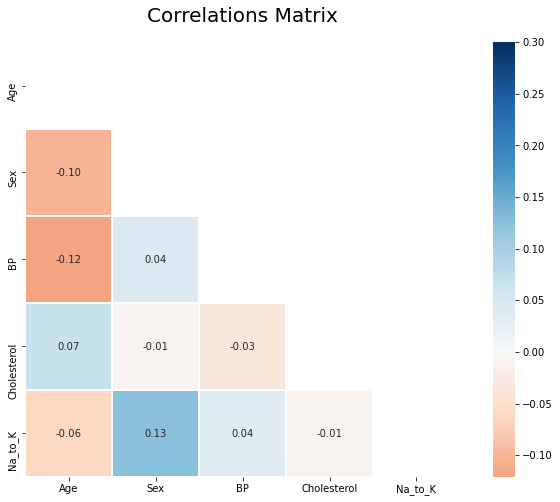

In [20]:
corr=data.corr()#['Survived']

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize = (12,8))
sns.heatmap(corr, 
            annot=True,
            mask = mask,
            cmap = 'RdBu',
            linewidths=.9, 
            linecolor='white',
            vmax = 0.3,
            fmt='.2f',
            center = 0,
            square=True)
plt.title("Correlations Matrix", y = 1,fontsize = 20, pad = 20);

In [21]:
X = data.drop(["Drug"],axis=1)
Y = data["Drug"]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

In [22]:
Train_X

,Age,Sex,BP,Cholesterol,Na_to_K
134,42,2,3,2,21.036
66,29,1,3,2,12.856
26,31,1,3,2,30.366
113,65,2,1,1,13.769
168,51,2,1,1,23.003
...,...,...,...,...,...
67,17,1,2,1,10.832
192,72,1,1,2,16.310
117,40,2,2,2,10.103
47,68,1,1,2,10.291


In [23]:

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (200, 5) (200,) 
Training set  --->  (160, 5) (160,) 
Testing set   --->  (40, 5)  (40,)


In [24]:
std = StandardScaler()
print('\033[1mStandardardization on Training set'.center(100))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(100))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                               Standardardization on Training set                               


,Age,Sex,BP,Cholesterol,Na_to_K
count,1.600000e+02,1.600000e+02,1.600000e+02,1.600000e+02,1.600000e+02
mean,-9.124645e-17,-3.011480e-16,-1.304512e-16,-2.359224e-17,-7.060325e-17
std,1.003140e+00,1.003140e+00,1.003140e+00,1.003140e+00,1.003140e+00
min,-1.809320e+00,-9.393364e-01,-1.300887e+00,-1.078036e+00,-1.366768e+00
25%,-8.003776e-01,-9.393364e-01,-1.300887e+00,-1.078036e+00,-7.853951e-01
50%,8.809424e-02,-9.393364e-01,-1.182625e-01,9.276126e-01,-3.027574e-01
75%,7.808011e-01,1.064581e+00,1.064362e+00,9.276126e-01,4.420358e-01
max,1.744567e+00,1.064581e+00,1.064362e+00,9.276126e-01,3.086464e+00



                                Standardardization on Testing set                                


,Age,Sex,BP,Cholesterol,Na_to_K
count,40.000000,40.000000,40.000000,40.000000,40.000000
mean,-0.217600,0.112720,-0.206959,-0.225635,0.000647
std,0.962306,1.013454,0.942587,1.004109,1.030262
min,-1.568379,-0.939336,-1.300887,-1.078036,-1.309114
25%,-1.056378,-0.939336,-1.300887,-1.078036,-0.672595
50%,-0.423906,1.064581,-0.118262,-1.078036,-0.283331
75%,0.630213,1.064581,1.064362,0.927613,0.563783
max,1.503626,1.064581,1.064362,0.927613,2.723276


In [49]:
DT_model = DecisionTreeClassifier(criterion='entropy')

In [50]:
DT_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')

In [51]:
DT = DT_model.fit(Train_X_std, Train_Y)#.best_estimator_
pred = DT.predict(Test_X_std)

In [52]:
def Classification_Summary(pred,pred_prob,i):
    Accuracy=round(accuracy_score(Test_Y, pred),3)*100   
    Precision =round(precision_score(Test_Y, pred, average='weighted'),3)*100 #
    Recall=round(recall_score(Test_Y, pred, average='weighted'),3)*100 #
    F1_score=round(f1_score(Test_Y, pred, average='weighted'),3)*100 #
#     print('{}{}\033[1m Evaluating {} \033[0m{}{}\n'.format('<'*3,'-'*25,Evaluation_Results.index[i], '-'*25,'>'*3))
    print('Accuracy = {}%'.format(round(accuracy_score(Test_Y, pred),3)*100))
    print('F1 Score = {}%'.format(round(f1_score(Test_Y, pred, average='weighted'),3)*100)) #
    print('\n \033[1mConfusiton Matrix:\033[0m\n',confusion_matrix(Test_Y, pred))
    print('\n\033[1mClassification Report:\033[0m\n',classification_report(Test_Y, pred))
    

In [53]:
pred_prob = DT.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,1)

Accuracy = 100.0%
F1 Score = 100.0%

 Confusiton Matrix:
 [[19  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  1  0  0]
 [ 0  0  0  3  0]
 [ 0  0  0  0 14]]

Classification Report:
               precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        19
       drugA       1.00      1.00      1.00         3
       drugB       1.00      1.00      1.00         1
       drugC       1.00      1.00      1.00         3
       drugX       1.00      1.00      1.00        14

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



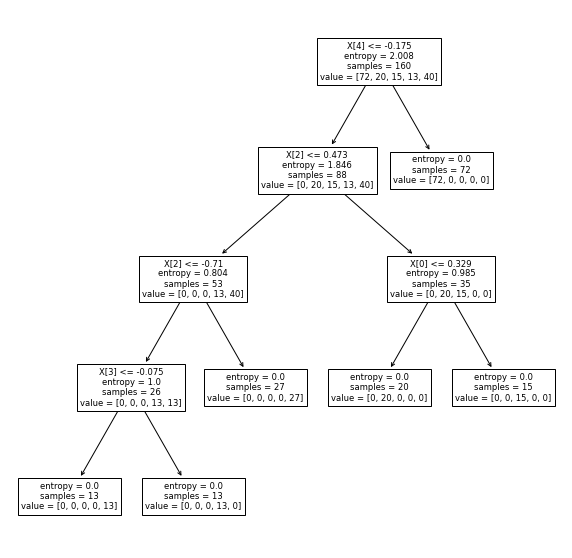

In [54]:
plt.figure(figsize=(10,10))
tree.plot_tree(DT)

plt.show()